In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [4]:
data = pd.read_csv('/content/churn_data.csv')

In [5]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**METADATA**

In [6]:
data.shape

(7042, 9)

In [7]:
data.describe

<bound method NDFrame.describe of       customerID  tenure PhoneService  ... MonthlyCharges TotalCharges Churn
0     7590-VHVEG       1           No  ...          29.85        29.85    No
1     5575-GNVDE      34          Yes  ...          56.95       1889.5    No
2     3668-QPYBK       2          Yes  ...          53.85       108.15   Yes
3     7795-CFOCW      45           No  ...          42.30      1840.75    No
4     9237-HQITU       2          Yes  ...          70.70       151.65   Yes
...          ...     ...          ...  ...            ...          ...   ...
7037  2569-WGERO      72          Yes  ...          21.15       1419.4    No
7038  6840-RESVB      24          Yes  ...          84.80       1990.5    No
7039  2234-XADUH      72          Yes  ...         103.20       7362.9    No
7040  4801-JZAZL      11           No  ...          29.60       346.45    No
7041  8361-LTMKD       4          Yes  ...          74.40        306.6   Yes

[7042 rows x 9 columns]>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [9]:
data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**ANALYZING BY GRAPHS**

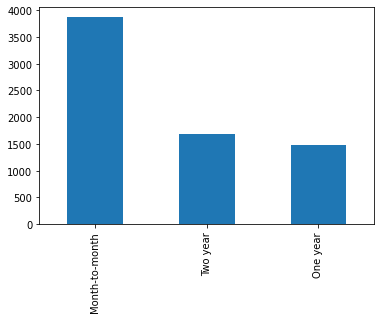

In [10]:
data.Contract.value_counts().plot(kind='bar')

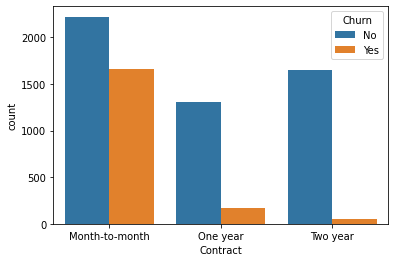

In [11]:
sns.countplot(x='Contract', hue='Churn', data=data)

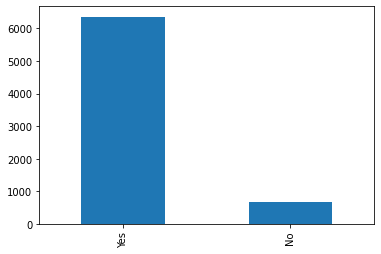

In [12]:
data.PhoneService.value_counts().plot(kind='bar')

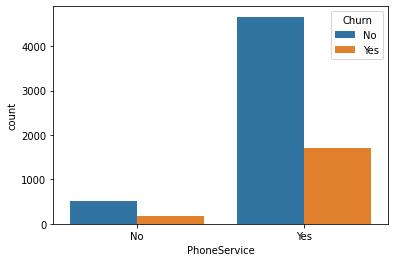

In [13]:
sns.countplot(x='PhoneService', hue='Churn', data=data)

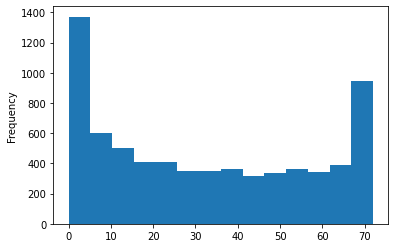

In [14]:
data.tenure.plot.hist(bins=14)

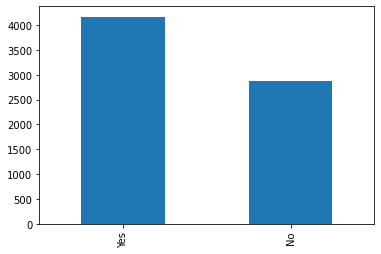

In [15]:
data.PaperlessBilling.value_counts().plot(kind='bar')

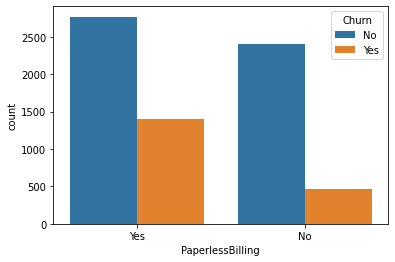

In [16]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=data)

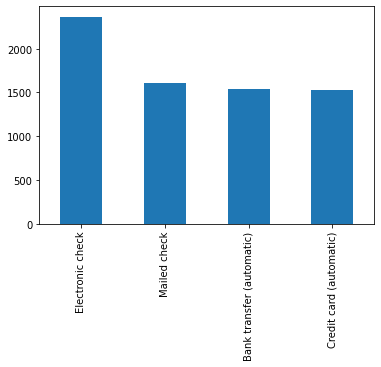

In [17]:
data.PaymentMethod.value_counts().plot(kind='bar')

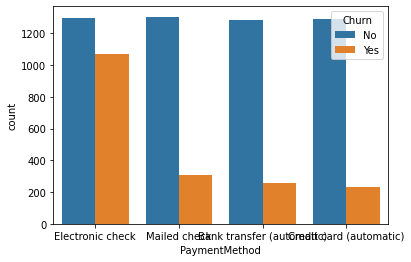

In [18]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)

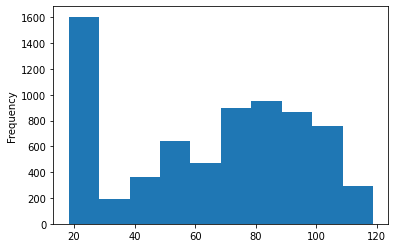

In [19]:
data.MonthlyCharges.plot.hist(bins=10)

**DATA TRANSFORMATION**

In [20]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
data.drop('customerID', axis=1, inplace=True)
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
phoneservice = pd.get_dummies(data['PhoneService'], drop_first=True)
phoneservice = phoneservice.rename(columns= {'Yes': 'phoneservice'}, inplace = False)
phoneservice.head()

,phoneservice
0,0
1,1
2,1
3,0
4,1


In [23]:
contract = pd.get_dummies(data['Contract'], drop_first=True)
contract.head()

,One year,Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [24]:
paperlessbilling = pd.get_dummies(data['PaperlessBilling'], drop_first=True)
paperlessbilling = paperlessbilling.rename(columns= {'Yes': 'paperlessbilling'}, inplace = False)
paperlessbilling.head()

,paperlessbilling
0,1
1,0
2,1
3,0
4,1


In [25]:
paymentmethod = pd.get_dummies(data['PaymentMethod'], drop_first=True)
paymentmethod.head()

,Credit card (automatic),Electronic check,Mailed check
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [26]:
churn = pd.get_dummies(data['Churn'], drop_first=True)
churn = churn.rename(columns= {'Yes': 'churn'}, inplace = False)
churn.head()

,churn
0,0
1,0
2,1
3,0
4,1


In [27]:
data = pd.concat([data, phoneservice, contract, paperlessbilling, paymentmethod, churn], axis=1)
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,phoneservice,One year,Two year,paperlessbilling,Credit card (automatic),Electronic check,Mailed check,churn
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0,0,1,0,1,0,0
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,1,1,0,0,0,0,1,0
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,1,1
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1,0,0,0,0,0,0
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0,0,1,0,1,0,1


In [28]:
data.drop(columns=['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'TotalCharges'], axis=1, inplace=True)
data.head()

,tenure,MonthlyCharges,phoneservice,One year,Two year,paperlessbilling,Credit card (automatic),Electronic check,Mailed check,churn
0,1,29.85,0,0,0,1,0,1,0,0
1,34,56.95,1,1,0,0,0,0,1,0
2,2,53.85,1,0,0,1,0,0,1,1
3,45,42.30,0,1,0,0,0,0,0,0
4,2,70.70,1,0,0,1,0,1,0,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tenure                   7042 non-null   int64  
 1   MonthlyCharges           7042 non-null   float64
 2   phoneservice             7042 non-null   uint8  
 3   One year                 7042 non-null   uint8  
 4   Two year                 7042 non-null   uint8  
 5   paperlessbilling         7042 non-null   uint8  
 6   Credit card (automatic)  7042 non-null   uint8  
 7   Electronic check         7042 non-null   uint8  
 8   Mailed check             7042 non-null   uint8  
 9   churn                    7042 non-null   uint8  
dtypes: float64(1), int64(1), uint8(8)
memory usage: 165.2 KB


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
X = data.drop('churn', axis=1)

In [32]:
Y = data['churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=1)

In [34]:
log = LogisticRegression(solver='lbfgs', max_iter=1000)

In [35]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
p = log.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, p))

0.7989778534923339
